In [1]:
import pandas
import os
import json
import numpy as np
df = pandas.read_json('./data/logs.json')


In [4]:
words = df['sentences'].map(lambda x: list(map(lambda y: y['words'], x))).explode().explode().reset_index()
words = words[['sentences']].rename(columns={'sentences': 'word'})
words = words['word'].map(lambda x: str(x).lower()).unique()

In [224]:
df['wordLen'] = df['sentences'].map(lambda x: len([word for sentecne in x for word in sentecne['words']]))

In [225]:
df2 = df.copy()
df2['i'] = np.arange(len(df2))
df3 = df2.copy()
df2 = df2.explode('sentences')
df2['signalWord'] = df2['sentences'].map(lambda x: [[x['words'][i].lower(), 0 if i in x['unknownIndice'] else 1]for i in range(len(x['words']))])
df3['signalWord'] = df2.groupby('i')['signalWord'].apply(sum)
del df3['i']
df2 = df3

In [226]:
from gogorani.timeutil import parse_ts
df2['time'] = df2['time'].map(lambda x: parse_ts(x))

In [242]:
df2['wpm'] = df2['wordLen'] / (df2['eltime']/1000) * 60
df2[(df2['userId'] == '8ACCQYz8NMc4Lc9Nze3R') & (df2['wpm'] < 400)]['wpm'].mean()

88.66435584497918

In [336]:
df3 = df2.loc[df2['wpm'] < 400]
df3.groupby('userId').mean()

,time,eltime,wordLen,wpm
userId,,,,
0Xrcusohq88Vty8osMNt,1.570244e+09,1.669333e+05,108.666667,87.346127
0bHdAlU0BUXj4OLRPzTZ,1.570182e+09,6.816071e+04,158.785714,179.938883
1Rsz2bT8FXMEeBUBHuxl,1.577001e+09,2.700514e+04,37.510638,71.452474
1yz9QcMjyGFMMdC6LPlJ,1.569800e+09,5.380455e+04,115.136364,150.579095
3dkoVNdFAoch4sxXEtWo,1.571123e+09,3.340476e+04,108.321429,218.788686
7ksTSrU6NjGGoZqnu7uG,1.569843e+09,2.861667e+05,157.666667,73.170477
7q6g9LLTonPCSCKtfDNZ,1.570322e+09,4.029000e+05,138.666667,72.111097
8ACCQYz8NMc4Lc9Nze3R,1.584310e+09,2.397579e+05,117.830409,88.664356
8CArk4ZlWo3dfxGPebtA,1.569698e+09,5.760000e+04,126.500000,131.069954


In [395]:
def handle(value):
    words = []
    knows = []
    times = []
    for x, t in zip(value['signalWord'], value['time']):
        for y in x:
            if len(y) != 2:
                continue    
            words.append(y[0])
            knows.append(y[1])
            times.append(t)
    return pandas.DataFrame({'word': words, 'known': knows, 'time': times})
df3 = df2.groupby('userId').apply(handle).reset_index(level=1, drop=True).reset_index()
df3.set_index(['userId', 'word'], inplace=True)
df3 = df3.sort_values(['time'])

In [401]:
def retention(df):
    out = []
    kk = False
    last = 0
    count = 0
    start = 0
    total = 0
    lastTime = 0
    lastKTime = 0
    for t, k in zip(df['time'], df['known']):
        last = 1 if k else 0
        if k == 0:
            lastKTime = t
        lastTime = t
        if k == 0 and kk:
            kk = False
            out.append(t - start)
        elif k == 1 and not kk:
            kk = True
            start = t
        count += 1
        total += k
    import datetime
    if lastTime != 0:
        out2 = lastTime - lastKTime
    else:
        out2 = 0
    return pandas.DataFrame({'ret': out, 'current': [last] * len(out), 'count': count, 'avg': total/count, 'currentTime': out2})
df3.loc['8ACCQYz8NMc4Lc9Nze3R'].groupby('word').apply(retention).groupby('word').mean().query('count < 10 and currentTime != 0 and current == 0').size

0

In [251]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [367]:
sns.load_dataset("fmri")

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [387]:
df4 = df3.loc['bmKnPQcO48sDdLAKy5Lu']
df4['known'] = 1 - df4['known']
df4 = df4.groupby(['time']).sum().reset_index()
df4['time'] -= df4.iloc[0]['time']
df4['time'] /= (60*60*24)

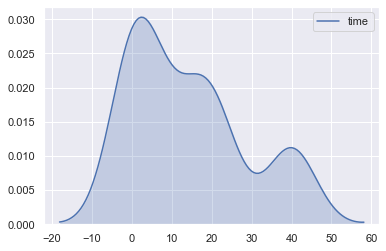

In [388]:
import numpy as np
sns.kdeplot(df4['time'], shade=True)

In [389]:
df5 = df2.loc[df2['userId'] == 'bmKnPQcO48sDdLAKy5Lu']
df5 = df5.loc[df5['wpm'] < 300]
df5['time'] -= df5.iloc[0]['time']
df5['time'] /= (60*60*24)

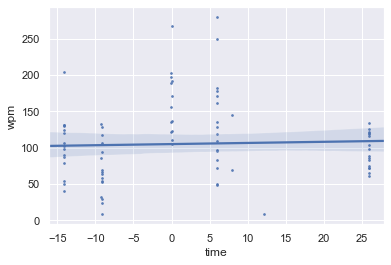

In [390]:
sns.regplot(x="time", y="wpm", data=df5,  robust=True, scatter_kws={'s':3})

In [30]:
df3 = df3.loc[~df3['classId'].isin(['test', 'test2'])]
df3['len'] = len(df3['signalWord'])
userDf = df3[['userId', 'classId', 'eltime', 'scorePerc', 'len']].groupby(['userId', 'classId']).agg('mean')
userDf['eltime'] /= 1000
whiteUserDf = userDf.loc[userDf['eltime'] > 11].reset_index()
df3 = df3.merge(whiteUserDf[['userId']], on='userId', how='inner')

In [31]:
whiteUserDf

,userId,classId,eltime,scorePerc,len
0,0bHdAlU0BUXj4OLRPzTZ,19-grade-6,63.706667,0.454369,1936.0
1,1yz9QcMjyGFMMdC6LPlJ,19-grade-6,53.804545,0.033136,1936.0
2,3dkoVNdFAoch4sxXEtWo,19-grade-6,26.308000,-0.705699,1936.0
3,7ksTSrU6NjGGoZqnu7uG,19-grade-6,111.967742,0.180287,1936.0
4,AWJ3AzY0AdAUKDqerSwH,19-grade-6,28.882249,-0.821458,1936.0
5,GDQqFBeAkT3BM8LaUf4e,19-grade-7-joy,35.259441,-0.449977,1936.0
6,Jj9P1sIqjLLF0wVqDFeX,19-grade-6,57.708163,-0.159752,1936.0
7,NdlYszQsqy4y8pKYKj8N,19-grade-7-joy,89.949123,-1.780588,1936.0
8,OQJ8K3jcLOM3eYaImkyN,19-grade-8,87.883065,-1.682042,1936.0
9,VbFRYXiXVyBLWzGDlqqm,19-grade-6,22.784884,-0.299999,1936.0


In [32]:
whiteUserDf = whiteUserDf.merge(df3.groupby('userId')['userId'].agg('count').to_frame('c'), on='userId', how='inner')

In [33]:
whiteUserDf

,userId,classId,eltime,scorePerc,len,c
0,0bHdAlU0BUXj4OLRPzTZ,19-grade-6,63.706667,0.454369,1936.0,30
1,1yz9QcMjyGFMMdC6LPlJ,19-grade-6,53.804545,0.033136,1936.0,22
2,3dkoVNdFAoch4sxXEtWo,19-grade-6,26.308000,-0.705699,1936.0,100
3,7ksTSrU6NjGGoZqnu7uG,19-grade-6,111.967742,0.180287,1936.0,31
4,AWJ3AzY0AdAUKDqerSwH,19-grade-6,28.882249,-0.821458,1936.0,169
5,GDQqFBeAkT3BM8LaUf4e,19-grade-7-joy,35.259441,-0.449977,1936.0,143
6,Jj9P1sIqjLLF0wVqDFeX,19-grade-6,57.708163,-0.159752,1936.0,147
7,NdlYszQsqy4y8pKYKj8N,19-grade-7-joy,89.949123,-1.780588,1936.0,57
8,OQJ8K3jcLOM3eYaImkyN,19-grade-8,87.883065,-1.682042,1936.0,124
9,VbFRYXiXVyBLWzGDlqqm,19-grade-6,22.784884,-0.299999,1936.0,86


In [59]:
df3[['time', 'userId', 'eltime', 'scorePerc', 'classId', 'signalWord']].to_csv('logs.csv', index=False)